In [1]:
import twitter
consumer_key = "xzSXE5Fvx1ZL6P6PUNwXg56Ff"
consumer_secret = "9IgUnHkE2Pn0Di2v8HySatcryxuW6QtU7YNNJITT76LZM0puIP"
access_token = "393277154-vVEflsJ6aLcOUg8eJ9K8TBo1vMsJiYd9btPKv3p5"
access_token_secret = "iHR5QYIrOZ2v1mrvW20PjrpNcIvDNYmdorYpZHmz1HtXS"
authorization = twitter.OAuth(access_token, access_token_secret, consumer_key, consumer_secret)
t = twitter.Twitter(auth=authorization, retry=True)

In [2]:
import os
import json
data_folder = os.path.join(os.path.expanduser("~"), "Data", "twitter")
output_filename = os.path.join(data_folder, "python_tweets.json")


In [3]:
original_users = [] 
tweets = []
user_ids = {}
search_results = t.search.tweets(q="python", count=10)['statuses']
for tweet in search_results:
    if 'text' in tweet:
        original_users.append(tweet['user']['screen_name']) 
        user_ids[tweet['user']['screen_name']] = tweet['user']['id']
        tweets.append(tweet['text'])
output_filename = os.path.join(os.path.expanduser("~"), "Models", "twitter", "python_context.pkl")

In [4]:
len(tweets)
from nltk import word_tokenize
from sklearn.base import TransformerMixin
class NLTKBOW(TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return [{word: True for word in word_tokenize(document)}
                 for document in X]
import en_core_web_sm
nlp = en_core_web_sm.load()
import spacy
from sklearn.base import TransformerMixin

class BagOfWords(TransformerMixin):
    def fit(self, X, y=None):
        return self
 
    def transform(self, X):
        results = []
        for document in X:
            row = {}
            for word in list(nlp(document, tag=False, parse=False, entity=False)):
                if len(word.text.strip()):
                    row[word.text] = True
                    results.append(row)
        return results

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction import DictVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.externals import joblib
input_filename = os.path.join(os.path.expanduser("~"), "Data", "twitter", "python_tweets.json")
classes_filename = os.path.join(os.path.expanduser("~"), "Data", "twitter", "python_classes.json")
tweets = []
with open(input_filename) as inf:
    for line in inf:
        if len(line.strip()) == 0:
            continue
        tweets.append(json.loads(line)['text'])
with open(classes_filename) as inf:
    labels = json.load(inf)
n_samples = min(len(tweets), len(labels))
sample_tweets = [t.lower() for t in tweets[:n_samples]]
labels = labels[:n_samples]

pipeline = Pipeline([('bag-of-words', NLTKBOW()),
                     ('vectorizer', DictVectorizer()),
                     ('naive-bayes', BernoulliNB())
                     ])

model = pipeline.fit(tweets, labels)
joblib.dump(model, output_filename)
model_filename = os.path.join(os.path.expanduser("~"), "Models", "twitter", "python_context.pkl")

C:\Users\vamsh\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [6]:
from sklearn.base import TransformerMixin
from nltk import word_tokenize

class NLTKBOW(TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return [{word: True for word in word_tokenize(document)}
                 for document in X]


In [7]:
#dict = { }
#if not os.path.isfile(model_filename):
 #  with open(model_filename,'wb') as file:
  #     pickle.dump(dict, file)
   #file.close() 
from sklearn.externals import joblib
context_classifier = joblib.load(model_filename)

In [8]:
y_pred = context_classifier.predict(tweets)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0])

In [9]:
print(len(tweets))
print(original_users)
relevant_tweets = [tweets[i] for i in range(len(tweets)) if y_pred[i] == 1]
relevant_users = [original_users[i] for i in range(len(tweets)) if y_pred[i] == 1]
print(len(relevant_tweets))

10
['pythonbot_', 'pythonbot_', 'DD_FaFa_', 'JesuisSanta', 'k_can_python', 'Python_lap', 'santainesense', 'StephaniePaser1', 'cleusonrj', 'Taieb_Bot']
4


In [10]:
import time
import sys

def get_friends(t, user_id):
    friends = []
    cursor = -1
    while cursor != 0:
        try:
            results = t.friends.ids(user_id=user_id, cursor=cursor, count=5000)
            friends.extend([friends for friends in results['ids']])
            cursor = results['next_cursor']
            if len(friends) >= 10000:
                break
            if cursor != 0:
                print("Collected {} friends so far, but there are more".format(len(friends)))
                sys.stdout.flush
        except TypeError as e:
            if results is None:
                print("You probably reached your API limit, waiting for 5 minutes")
                sys.stdout.flush()
                time.sleep(5*60)
            else:
                raise e
        except twitter.TwitterHTTPError as e:
            break
        finally:
            time.sleep(60)
    return friends

In [11]:

test_friends = get_friends(t, user_ids[relevant_users[0]])
print(test_friends)

Collected 5000 friends so far, but there are more
[196093916, 549465472, 1582703370, 3392053753, 386382839, 3114251045, 825023102765690880, 978274741, 773795113948614656, 361862627, 830506368809463808, 2834525685, 36589057, 4267044195, 14645160, 745622512432709632, 3730491497, 17233340, 476453865, 848172258401058816, 701434972842942468, 2953745608, 1951106910, 3032868600, 799188042670075905, 451594497, 177727037, 343635392, 19563642, 921005662871670784, 990706698, 965995277608943617, 984042077616033792, 217538774, 83514003, 2621461, 403634454, 47866745, 168588162, 2803239428, 319857830, 999381587220410370, 335662181, 39818130, 929008242780463104, 2874908184, 267234152, 116737030, 3324157260, 713194616, 456045019, 1178205080677490688, 1857820926, 1197591274938884096, 239564537, 26753251, 563572591, 752104388, 92297503, 739752670752346112, 1895137800, 88040701, 129249213, 77199489, 317655205, 619950768, 835161002689822720, 3162688401, 1337808480, 849558297543925760, 133451901, 7087771371

In [12]:
friends = {} 
for screen_name in relevant_users:
    user_id = user_ids[screen_name]
    friends[user_id] = get_friends(t, user_id)

Collected 5000 friends so far, but there are more


In [13]:
friends = {user_id:friends[user_id] 
    for user_id in friends
        if len(friends[user_id]) > 0}

In [14]:
from collections import defaultdict
def count_friends(friends): 
    friend_count = defaultdict(int)
    for friend_list in friends.values(): 
        for friend in friend_list:
            friend_count[friend] += 1 
    return friend_count

In [15]:
friend_count = count_friends(friends)
from operator import itemgetter
best_friends = sorted(friend_count, key=friend_count.get, reverse=True)


In [16]:
while len(friends) < 150:
    for user_id in best_friends:
        print(user_id)
        friends[user_id] = get_friends(t, user_id) 
        for friend in friends[user_id]: 
            friend_count[friend] += 1
        best_friends = sorted(friend_count, key=friend_count.get, reverse=True)
        break

739752670752346112
Collected 5000 friends so far, but there are more
2162697578
Collected 5000 friends so far, but there are more
9886592
2162697578
Collected 5000 friends so far, but there are more
9886592
16707004
Collected 5000 friends so far, but there are more
2162697578
Collected 5000 friends so far, but there are more
16707004
Collected 5000 friends so far, but there are more
2162697578
Collected 5000 friends so far, but there are more
184374808
1064063686464204800
16707004
Collected 5000 friends so far, but there are more
2162697578
Collected 5000 friends so far, but there are more
2255814462


In [17]:
best_friends

[1064063686464204800,
 16707004,
 20924605,
 2162697578,
 2255814462,
 184374808,
 17093617,
 1078994850140340224,
 1132567059903258624,
 210540467,
 1203743222176067589,
 1185066920418201600,
 1178423913757450253,
 1219020328271253507,
 2598639246,
 739563451,
 1212778708173373440,
 746061169849339905,
 3031700017,
 492890318,
 1068913287423766528,
 984131898619424770,
 4093475786,
 233945318,
 2248463483,
 2831551173,
 1000505346408902656,
 1139479992046407680,
 3194071636,
 1205748862528499713,
 1200488541693845506,
 1180434712587886592,
 1173934817152339968,
 1212322156152934400,
 4010776823,
 2730082041,
 1179635457027493888,
 1202898808268439554,
 1139587087710052353,
 1203227977166622720,
 1195651340669612032,
 1209757629049782273,
 1209827557157330944,
 51473850,
 1019835192100282368,
 1185268889480904705,
 1158398161884463105,
 9886592,
 1149069317557895169,
 3335731978,
 13298,
 16202671,
 18910026,
 109171537,
 135586045,
 149595940,
 312156369,
 1238033589708578816,
 123670

In [18]:
len(friends)
friends

{2728657237: [196093916,
  549465472,
  1582703370,
  3392053753,
  386382839,
  3114251045,
  825023102765690880,
  978274741,
  773795113948614656,
  361862627,
  830506368809463808,
  2834525685,
  36589057,
  4267044195,
  14645160,
  745622512432709632,
  3730491497,
  17233340,
  476453865,
  848172258401058816,
  701434972842942468,
  2953745608,
  1951106910,
  3032868600,
  799188042670075905,
  451594497,
  177727037,
  343635392,
  19563642,
  921005662871670784,
  990706698,
  965995277608943617,
  984042077616033792,
  217538774,
  83514003,
  2621461,
  403634454,
  47866745,
  168588162,
  2803239428,
  319857830,
  999381587220410370,
  335662181,
  39818130,
  929008242780463104,
  2874908184,
  267234152,
  116737030,
  3324157260,
  713194616,
  456045019,
  1178205080677490688,
  1857820926,
  1197591274938884096,
  239564537,
  26753251,
  563572591,
  752104388,
  92297503,
  739752670752346112,
  1895137800,
  88040701,
  129249213,
  77199489,
  317655205,
  619

In [19]:
import json
friends_filename = os.path.join(data_folder, "python_friends.json")
with open(friends_filename, 'w') as outf:
    json.dump(friends, outf)

In [20]:
with open(friends_filename) as inf:
    friends = json.load(inf)

In [21]:
len(friends), type(friends)

(11, dict)

In [22]:
import networkx as nx
G = nx.DiGraph()

main_users = friends.keys()
G.add_nodes_from(main_users)

for user_id in friends:
    for friend in friends[user_id]:
        if friend in main_users:
           G.add_edge(user_id, friend)

In [23]:
G

In [24]:
nx.draw?

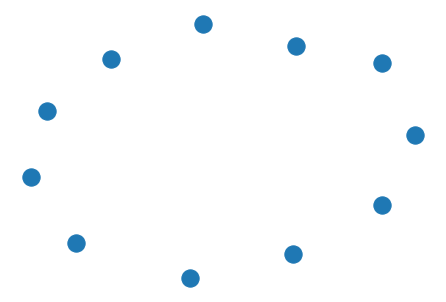

In [25]:
%matplotlib inline 
nx.draw(G)

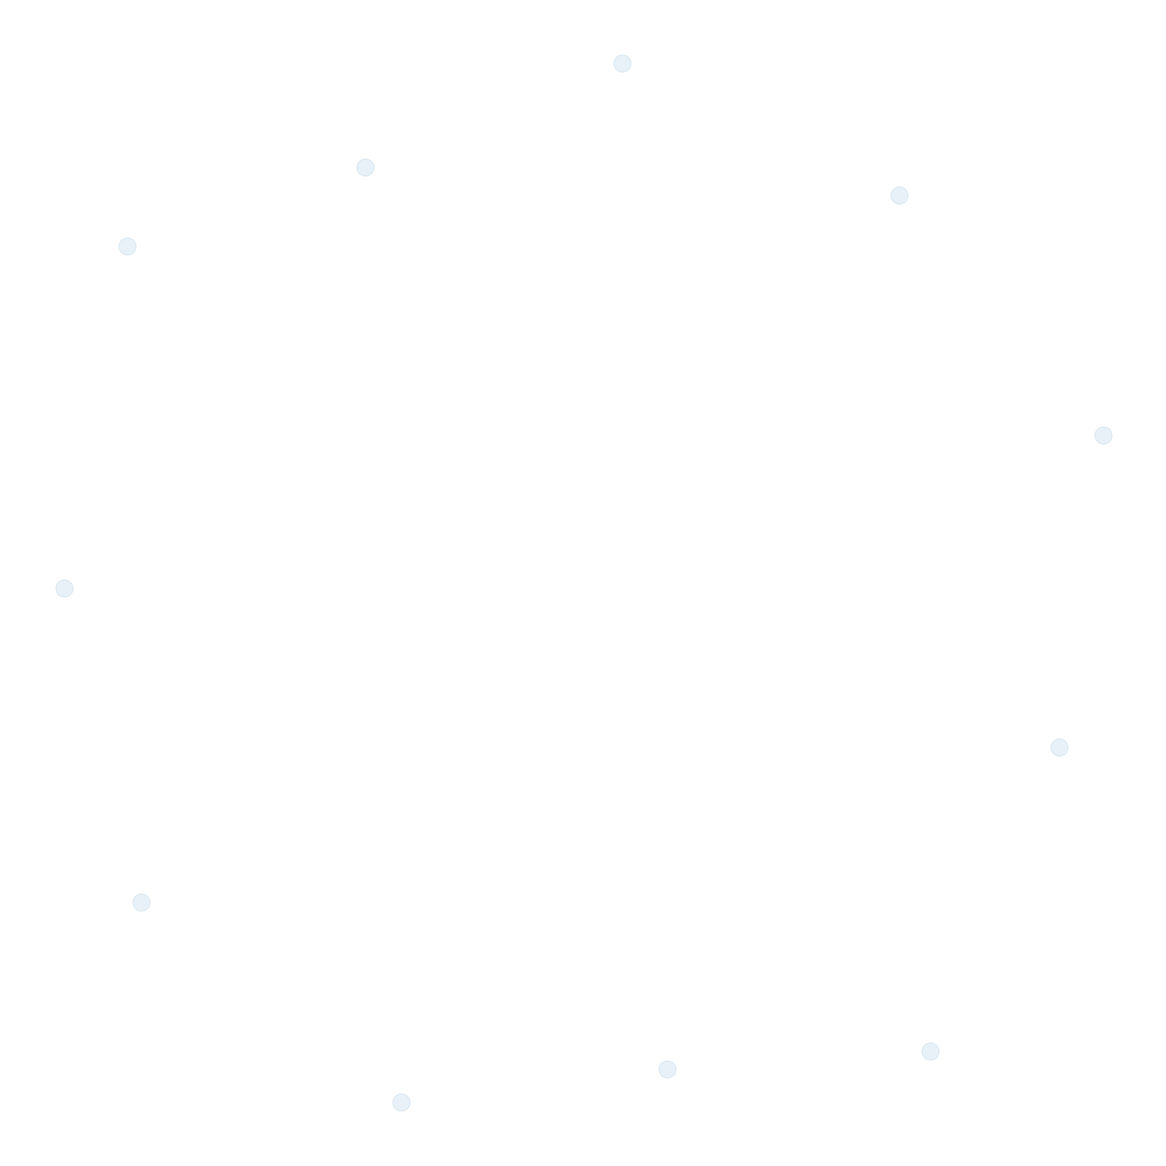

In [26]:
from matplotlib import pyplot as plt
fig = plt.figure(3,figsize=(20,20))
fig.add_axes([0.1,0.1,0.8,0.8])
nx.draw(G, alpha=0.1, edge_color='b')

In [27]:
friends = {user: set(friends[user]) for user in friends}

In [28]:
def compute_similarity(friends1, friends2):
    set_friends1 = set(friends1)
    set_friends2 = set(friends2)
    return len(set_friends1 & set_friends2) / len(set_friends1 | set_friends2)

In [29]:
import networkx as nx
def create_graph(friends, threshold=0):
    G = nx.Graph()
    weights = []
    for user1 in friends.keys():
        for user2 in friends.keys():
            if user1 == user2:
                continue
            weight = compute_similarity(friends[user1], friends[user2])
            weights.append(weight)
            if weight >= threshold:
                G.add_node(user1)
                G.add_node(user2)
                G.add_edge(user1, user2, weight=weight)
    return G

G = create_graph(friends, 0)

C:\Users\vamsh\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


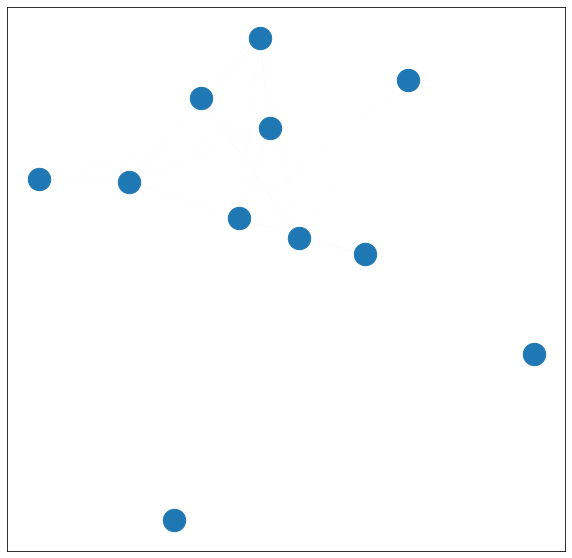

In [30]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500)

edgewidth = [ d['weight'] for (u,v,d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, width=edgewidth)

In [31]:
G = create_graph(friends, 0.1)
sub_graphs = nx.connected_component_subgraphs(G)

for i, sub_graph in enumerate(sub_graphs):
    n_nodes = len(sub_graph.nodes())
    print("Subgraph {0} has {1} nodes".format(i, n_nodes))

In [32]:
G = create_graph(friends, 0.15)
sub_graphs = nx.connected_component_subgraphs(G)

for i, sub_graph in enumerate(sub_graphs):
    n_nodes = len(sub_graph.nodes())
    print("Subgraph {0} has {1} nodes".format(i, n_nodes))

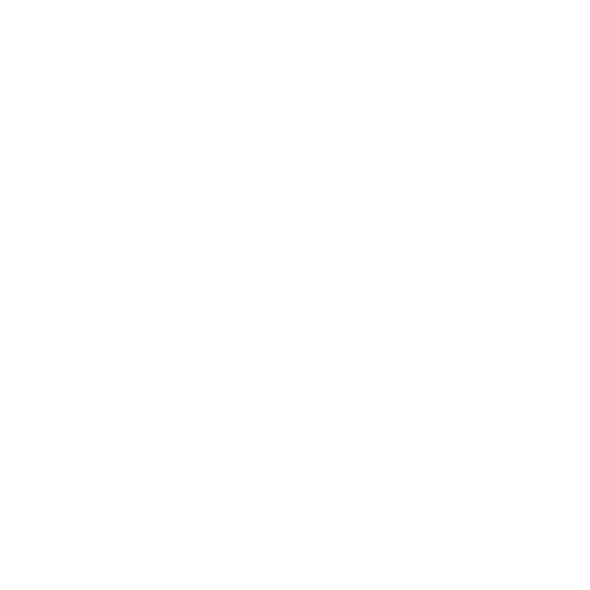

In [33]:
sub_graphs = nx.connected_component_subgraphs(G)
label_dict = {}
for i, sub_graph in enumerate(sub_graphs):
    for node in sub_graph.nodes():
        label_dict[node] = i
labels = [label_dict[node] for node in G.nodes()]

fig = plt.figure(figsize=(10,10))
fig.add_axes([0.1,0.1,0.8,0.8])
nx.draw(G,node_color=labels,cmap=plt.cm.Paired, node_size=500)

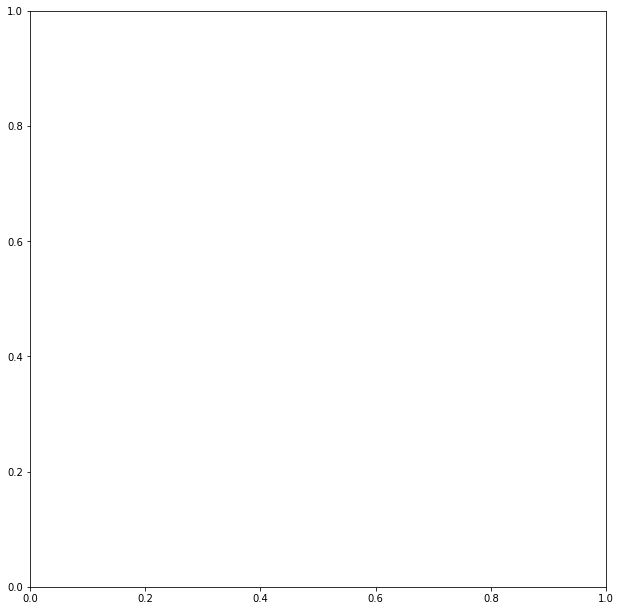

In [34]:
sub_graphs = nx.connected_component_subgraphs(G)
fig = plt.figure(figsize=(10,10))
fig.add_axes([0.1,0.1,0.8,0.8])
pos = nx.spring_layout(G)
for i, sub_graph in enumerate(sub_graphs):
    nodes = sub_graph.nodes()
    edges = sub_graph.edges()
    nx.draw_networkx_nodes(G, pos, nodes,node_size=500)
    nx.draw_networkx_edges(G, pos, edges)
    

0


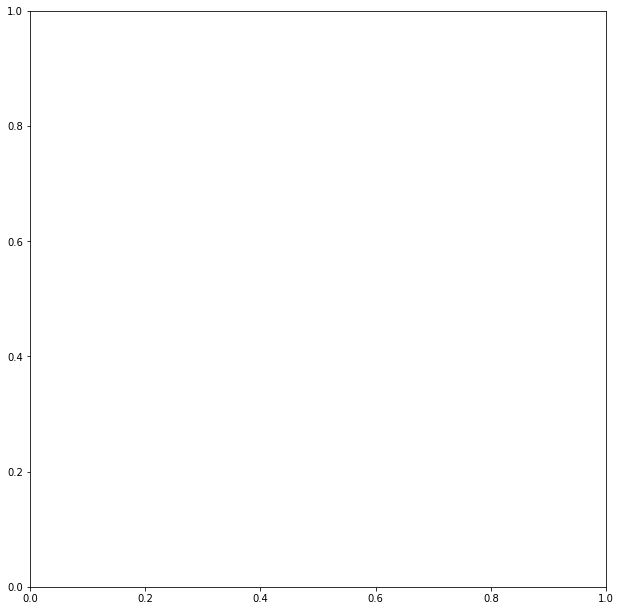

In [35]:
sub_graphs = nx.connected_component_subgraphs(G)
n_subgraphs = nx.number_connected_components(G)
print(n_subgraphs)
fig = plt.figure(figsize=(10, 10))
fig.add_axes([0.1,0.1,0.8,0.8])
for i, sub_graph in enumerate(sub_graphs):
    ax = fig.add_subplot(int(n_subgraphs / 2), 2, i)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, sub_graph.nodes(), ax=ax, node_size=500)
    nx.draw_networkx_edges(G, pos, sub_graph.edges(), ax=ax)


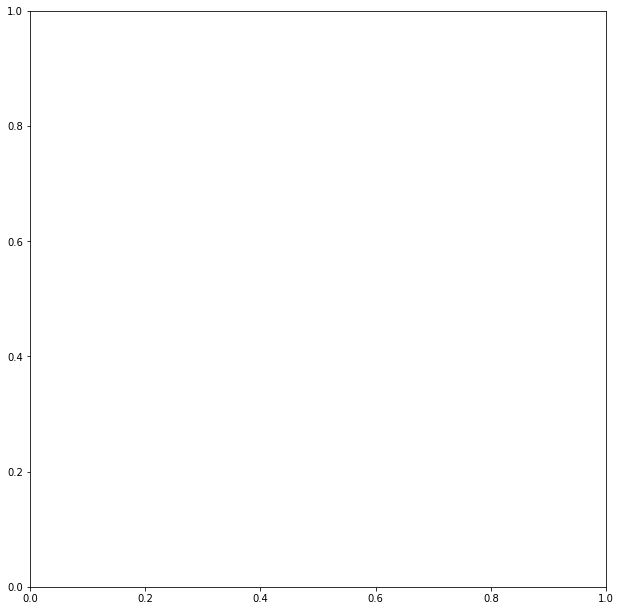

In [36]:
sub_graphs = nx.connected_component_subgraphs(G) 
n_subgraphs = nx.number_connected_components(G)
fig = plt.figure(figsize=(10, 10))
fig.add_axes([0.1,0.1,0.8,0.8])
for i, sub_graph in enumerate(sub_graphs):
    
    ax = fig.add_subplot(int(n_subgraphs / 3)+1, 3, i+1)
    #ax = fig.add_subplot(1, 1, 1)
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False)
    nx.draw(sub_graph, ax=ax)

In [37]:
print("Done")

Done


In [38]:
import numpy as np
from sklearn.metrics import silhouette_score

def silhouette_score(X, labels, metric='precomputed'):
    labels = np.array(labels)
    print(labels.shape)
    return np.mean(silhouette_samples(X, labels, metric=metric))

def compute_silhouette(threshold, friends):
    G = create_graph(friends, threshold=threshold) 
    if len(G.nodes()) < 2:
        return -99
    sub_graphs = nx.connected_component_subgraphs(G)

    if not (2 <= nx.number_connected_components(G) < len(G.nodes()) - 1): 
        return -99

    label_dict = {}
    for i, sub_graph in enumerate(sub_graphs): 
        for node in sub_graph.nodes(): 
            label_dict[node] = i

    labels = np.array([label_dict[node] for node in G.nodes()])
    X = nx.to_scipy_sparse_matrix(G).todense()
    X = 1 - X
    return silhouette_score(X, labels, metric='precomputed')
print(compute_silhouette(0.1, friends))

-99


In [39]:
from scipy.optimize import minimize

def invert(func):
    def inverted_function(*args, **kwds):
        return -func(*args, **kwds)
    return inverted_function

result = minimize(invert(compute_silhouette), 0.1, method='nelder-mead', args=(friends,), options={'maxiter':10, })
print(result)

 final_simplex: (array([[0.1       ],
       [0.10007813]]), array([99., 99.]))
           fun: 99.0
       message: 'Optimization terminated successfully.'
          nfev: 20
           nit: 7
        status: 0
       success: True
             x: array([0.1])


In [40]:
def inverted_silhouette(threshold, friends):
    return -compute_silhouette(threshold, friends)

In [41]:
from scipy.optimize import minimize
result = minimize(inverted_silhouette, 0.1, args=(friends,))

In [42]:
result

      fun: 99
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0.1])

In [43]:
G = create_graph(friends, threshold=0.135)
sub_graphs = nx.connected_component_subgraphs(G)

for i, sub_graph in enumerate(sub_graphs):
    n_nodes = len(sub_graph.nodes())
    print("Subgraph {0} has {1} nodes".format(i, n_nodes))

In [44]:
labels

[]

In [45]:
def silhouette_score(X, labels, metric='precomputed'):
    labels = np.array(labels)
    print(labels.shape)
    return np.mean(silhouette_samples(X, labels, metric=metric))

def silhouette_samples(X, labels, metric='precomputed'):
    print(X.shape)
    distances = X
    n = labels.shape[0]
    A = np.array([_intra_cluster_distance(distances[i], labels, i)
                  for i in range(n)])
    B = np.array([_nearest_cluster_distance(distances[i], labels, i)
                  for i in range(n)])
    sil_samples = (B - A) / np.maximum(A, B)
    return np.nan_to_num(sil_samples)

def _intra_cluster_distance(distances_row, labels, i):
    
    mask = (labels == labels[i])
    mask[i] = False
    mask = mask.reshape(distances_row.shape)
    a = np.mean(distances_row[mask])
    return a


def _nearest_cluster_distance(distances_row, labels, i):
    
    label = labels[i]
    b = np.min([np.mean(distances_row[(labels == cur_label).reshape(distances_row.shape)])
               for cur_label in set(labels) if not cur_label == label])
    return b

In [46]:
len(friends.keys())

11

In [47]:
import networkx as nx
G = nx.DiGraph()

In [48]:
main_users = [int(f) for f in friends.keys()]
G.add_nodes_from(main_users)

In [49]:
for user_id in friends:
    for friend in friends[user_id]:
        if friend in main_users:
            G.add_edge(user_id, friend)

In [50]:
mu = set(main_users)
au = set([f for ff in friends.values() for f in ff])
len(mu), len(au), len(mu & au)

(11, 55909, 8)

C:\Users\vamsh\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


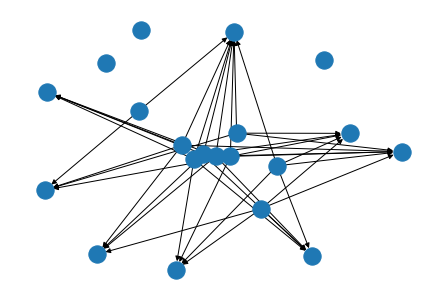

In [51]:
%matplotlib inline
nx.draw(G)

(0.45, 0.55)

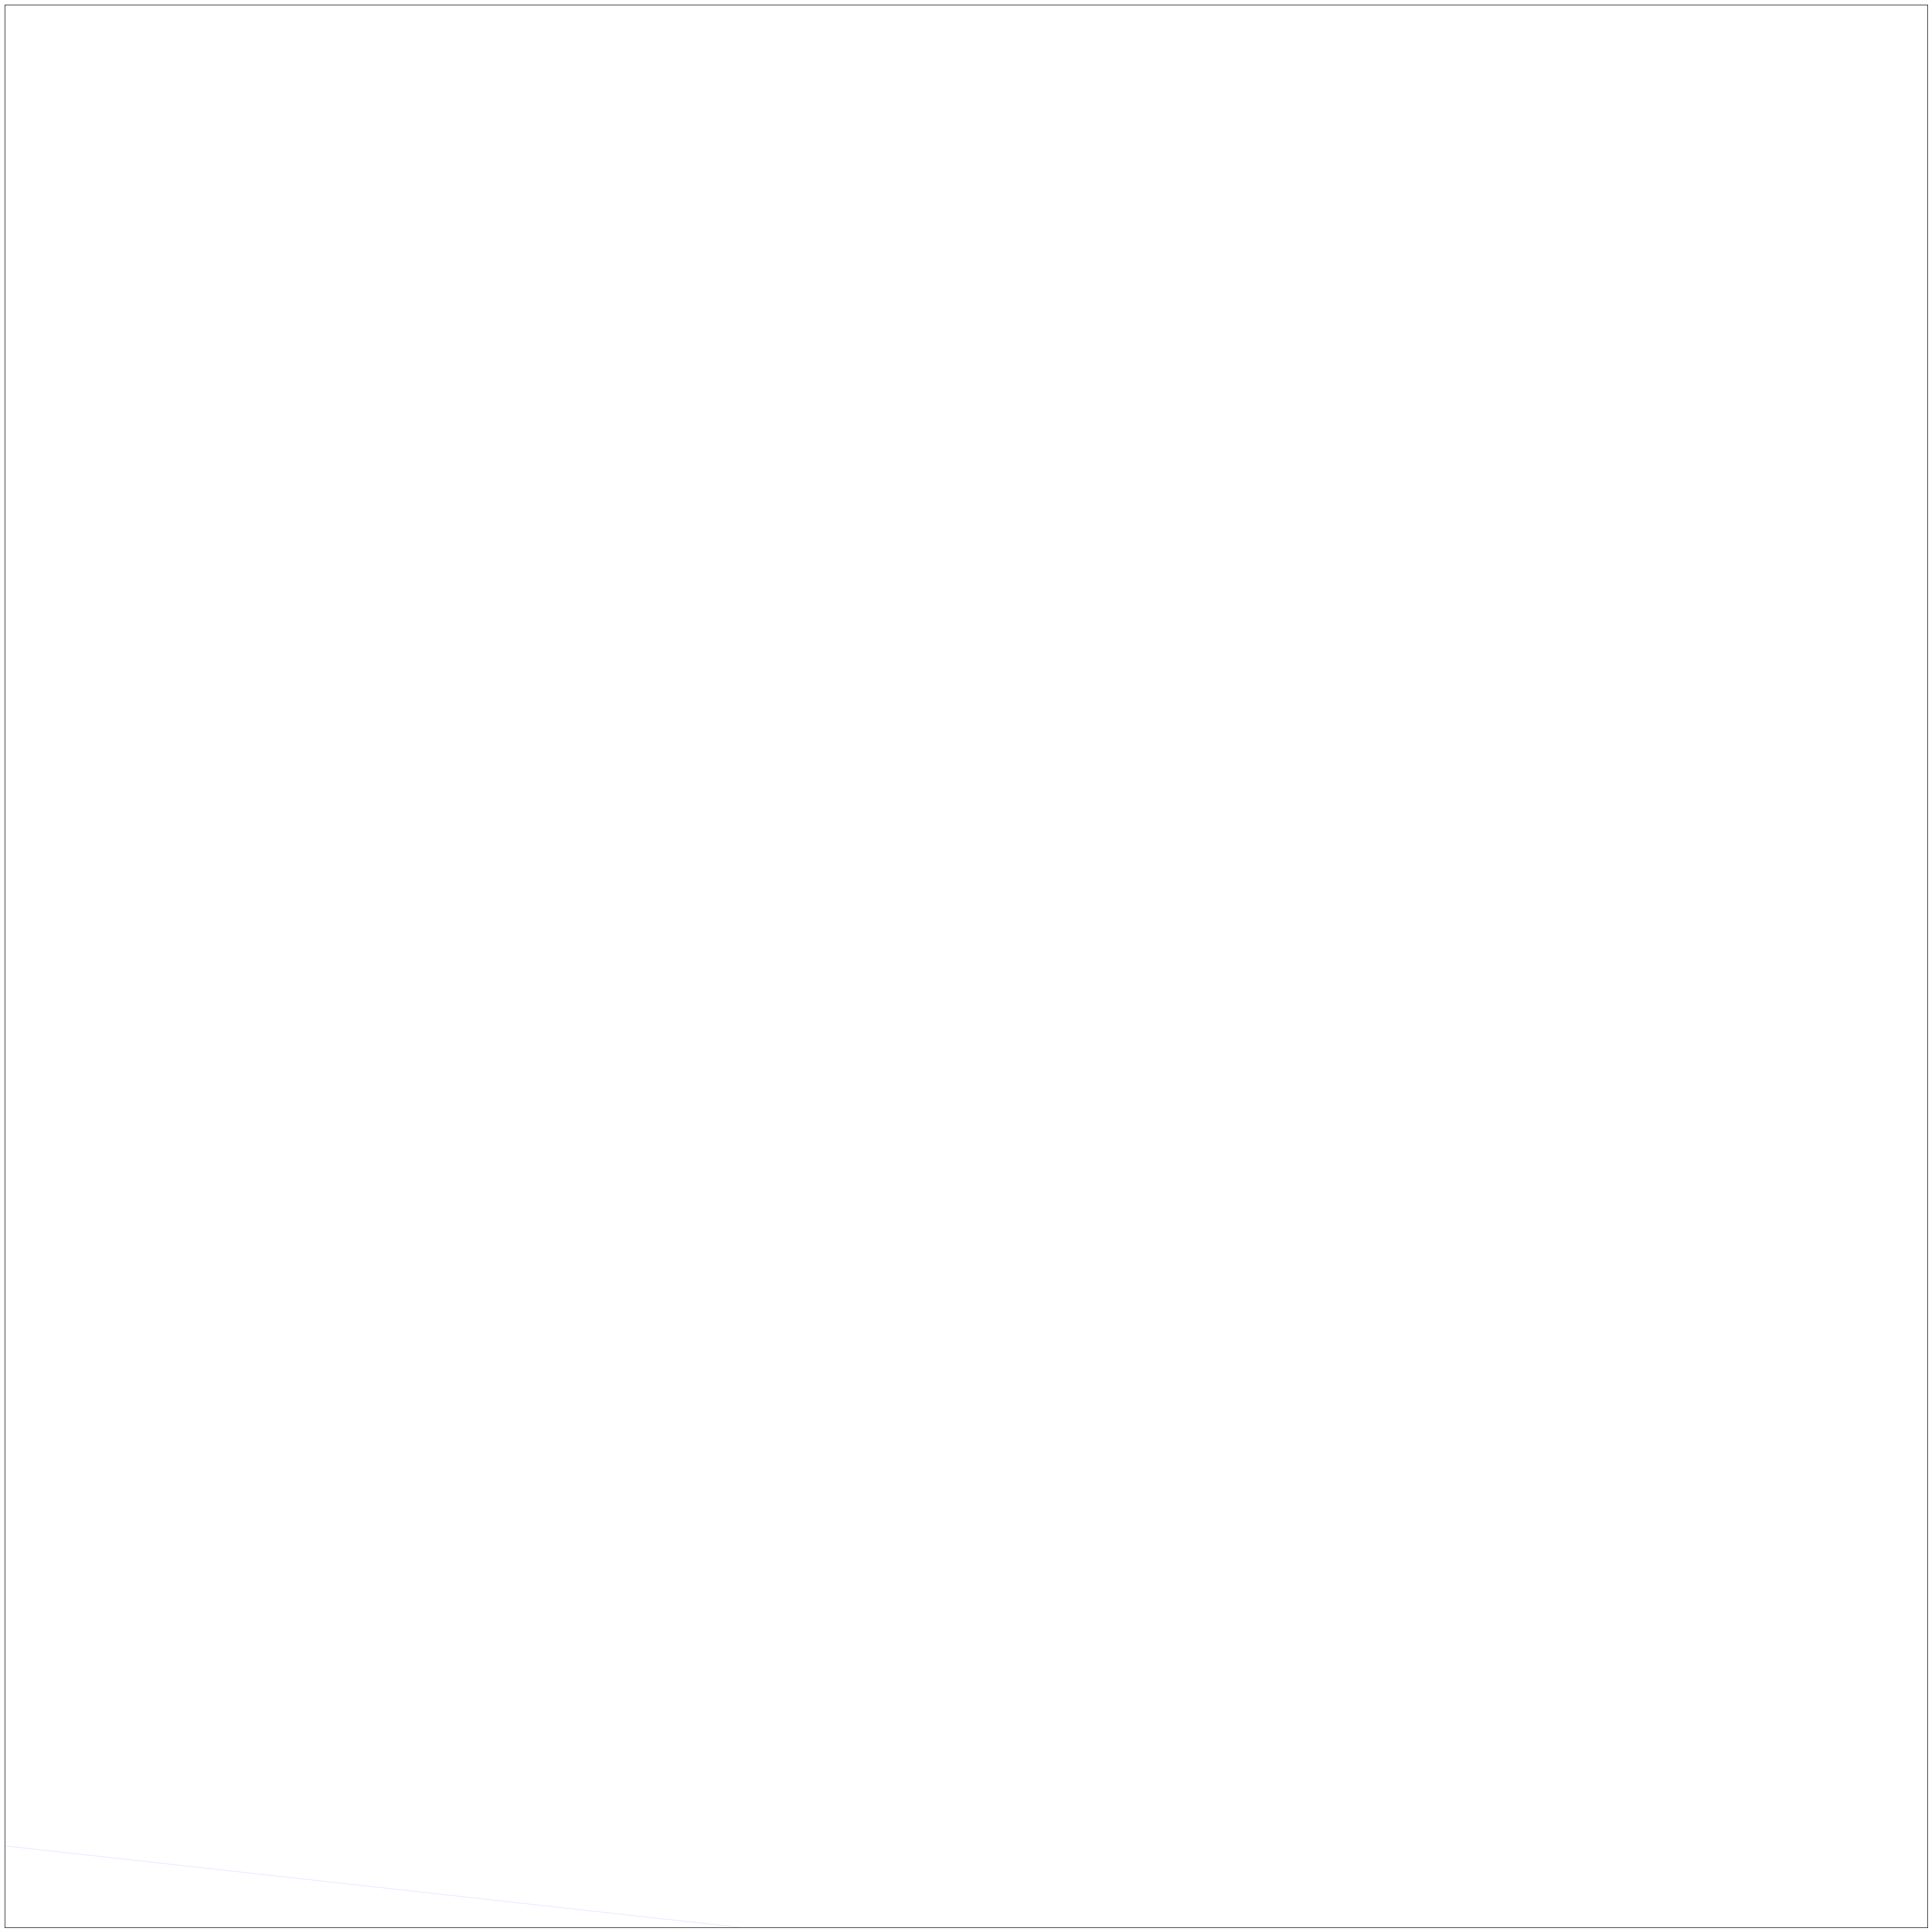

In [52]:
from matplotlib import pyplot as plt
plt.figure(3,figsize=(40,40))
nx.draw(G, alpha=0.1, edge_color='b', node_color='g', node_size=2000)
plt.axis('on')
plt.xlim(0.45, 0.55)
plt.ylim(0.45, 0.55)

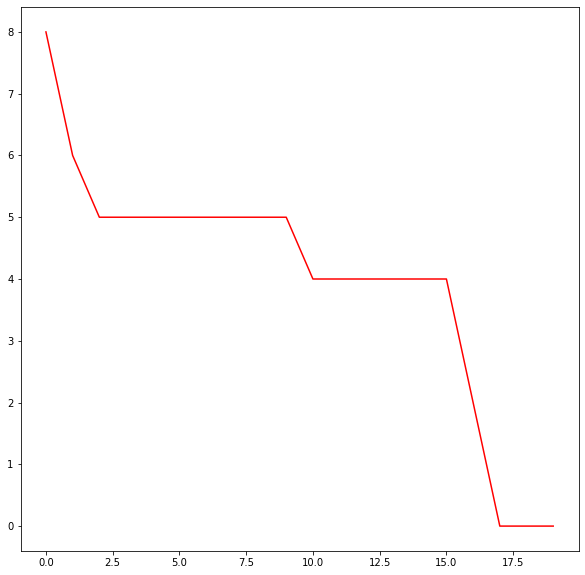

In [53]:
from matplotlib import pyplot as plt
degree_values = [v for k, v in nx.degree(G)]
plt.figure(3,figsize=(10, 10))
connection_number = sorted(degree_values, reverse=True)
plt.plot(connection_number,'r-')

(array([7.361e+03, 5.100e+03, 3.234e+03, 2.000e+03, 1.172e+03, 6.450e+02,
        2.950e+02, 1.340e+02, 5.300e+01, 6.000e+00]),
 array([7.09022238e-06, 8.75508009e-02, 1.75094512e-01, 2.62638222e-01,
        3.50181933e-01, 4.37725644e-01, 5.25269354e-01, 6.12813065e-01,
        7.00356776e-01, 7.87900486e-01, 8.75444197e-01]),
 <a list of 10 Patch objects>)

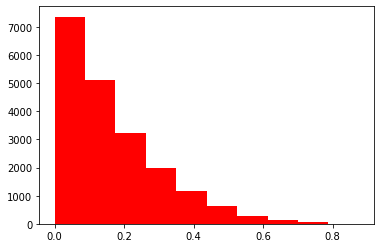

In [54]:

import numpy as np
import matplotlib.pyplot as plt
data = 1 - np.random.power(5, (20000,))

plt.hist(data, bins=10,facecolor="r")

In [55]:
friends = {user: set(friends[user]) for user in friends}

In [56]:
def compute_similarity(friends1, friends2):
    return len(friends1 & friends2) / len(friends1 | friends2)

In [57]:
def create_graph(followers, threshold=0):
    G = nx.Graph()
    for user1 in friends.keys():
        for user2 in friends.keys():
            if user1 == user2:
                continue
            weight = compute_similarity(friends[user1], friends[user2])
            if weight >= threshold:
                G.add_node(user1)
                G.add_node(user2)
                G.add_edge(user1, user2, weight=weight)
    return G

In [58]:
G = create_graph(friends)

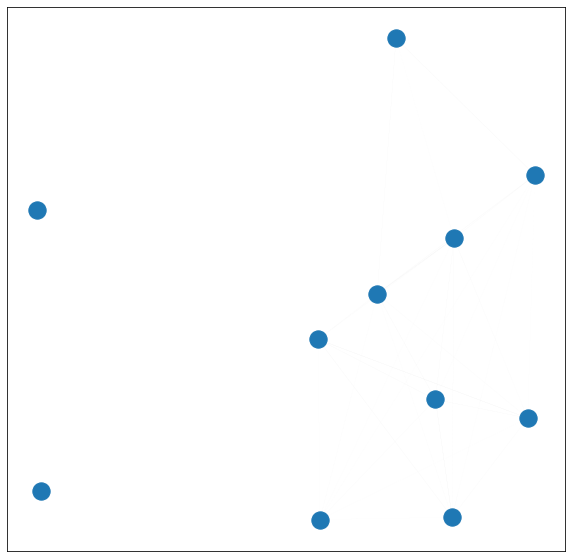

In [59]:
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
edgewidth = [ d['weight'] for (u,v,d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, width=edgewidth)

In [60]:
G = create_graph(friends, 0.1)
sub_graphs = nx.connected_component_subgraphs(G)
for i, sub_graph in enumerate(sub_graphs):
    n_nodes = len(sub_graph.nodes())
    print("Subgraph {0} has {1} nodes".format(i, n_nodes))

In [61]:
G = create_graph(friends, 0.25)
sub_graphs = nx.connected_component_subgraphs(G)

for i, sub_graph in enumerate(sub_graphs):
    n_nodes = len(sub_graph.nodes())
    print("Subgraph {0} has {1} nodes".format(i, n_nodes))

In [62]:
sub_graphs = nx.connected_component_subgraphs(G)
if (len(list(sub_graphs))>0):
    nx.draw(list(sub_graphs)[0])

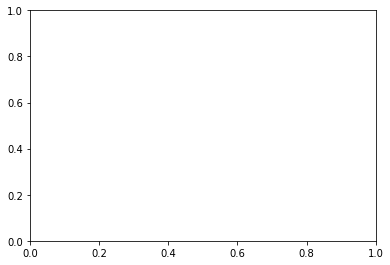

In [63]:

fig = plt.figure()
fig.add_axes([0.1,0.1,0.8,0.8])
fig.add_subplot?

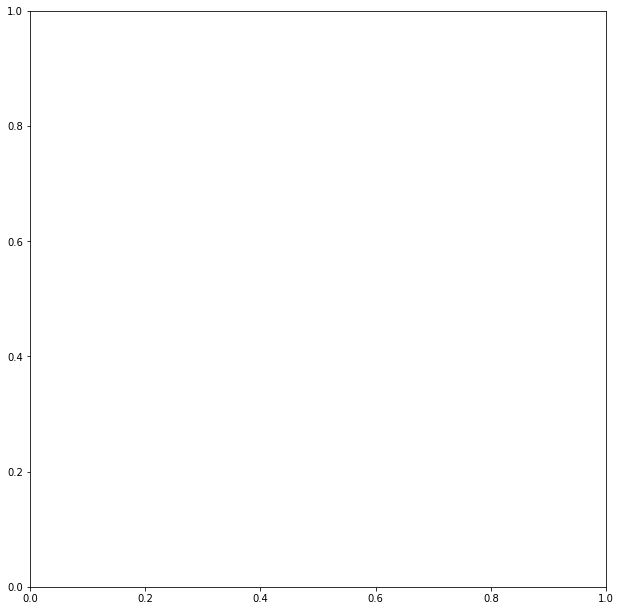

In [64]:
sub_graphs = nx.connected_component_subgraphs(G)
n_subgraphs = nx.number_connected_components(G)
fig = plt.figure(figsize=(10, 10))
fig.add_axes([0.1,0.1,0.8,0.8])
for i, sub_graph in enumerate(sub_graphs):
    ax = fig.add_subplot(int(n_subgraphs / 2), 2, i)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, sub_graph.nodes(), ax=ax, node_size=500)
    nx.draw_networkx_edges(G, pos, sub_graph.edges(), ax=ax)


In [65]:
from sklearn.metrics import silhouette_score

def compute_silhouette(threshold, friends):
    G = create_graph(friends, threshold=threshold)
    if len(G.nodes()) < 2:
        return -99
    sub_graphs = nx.connected_components(G)
    if not (2 <= nx.number_connected_components(G) < len(G.nodes()) - 1):
        return -99
    label_dict = {}
    for i, sub_graph in enumerate(sub_graphs):
        print(type(sub_graph))
        print(sub_graph)
        for node in sub_graph:
            label_dict[node] = i
    labels = np.array([label_dict[node] for node in G.nodes()])
    X = nx.to_scipy_sparse_matrix(G)
    return silhouette_score(X, labels, metric='precomputed')

In [66]:
compute_silhouette(0.25, friends)

-99